This dataset comprises road freight statistics from Ireland and the UK, derived from the OECD 'Trends in the Transport Sector' survey, accessible at https://stats.oecd.org/#. It is utilized under the terms and conditions of the OECD data usage license, which allows for extraction, adaptation, and distribution for any purpose, including commercial endeavors, provided there is appropriate attribution to the OECD.and is employed in accordance with the OECD's data usage terms and conditions.https://www.oecd.org/termsandconditions/

The Jupyter file contains two distinct datasets: ireland_road_freight, and france_road_freight. A separate analysis of each dataset will be conducted before combining them. This approach ensures a comprehensive, detailed, and tailored examination of each dataset, providing a clear and structured foundation for understanding, documenting, and potentially comparing different aspects of road freight transport.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("ireland_road_freight.csv")

In [3]:
df.head()

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2000,2000,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,12348,NaN,NaN
1,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2001,2001,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,12405,NaN,NaN
2,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2002,2002,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,14448,NaN,NaN
3,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2003,2003,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,15898,NaN,NaN
4,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2004,2004,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,17289,NaN,NaN


In [4]:
df1=pd.read_csv("france_road_freight.csv")

In [5]:
df1.head()

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2000,2000,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,155133,NaN,NaN
1,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2001,2001,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,158088,NaN,NaN
2,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2002,2002,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,156121,NaN,NaN
3,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2003,2003,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,156678,NaN,NaN
4,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2004,2004,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,166383,NaN,NaN


Both showing the similar columns 

# Data cleaning 

In [6]:
# Check for missing values in both datasets
missing_values_ireland = df.isnull().sum()
missing_values_france = df1.isnull().sum()

In [7]:
missing_values_ireland

COUNTRY                   0
Country                   0
VARIABLE                  0
Variable                  0
YEAR                      0
Year                      0
Unit Code                 0
Unit                      0
PowerCode Code            0
PowerCode                 0
Reference Period Code    63
Reference Period         63
Value                     0
Flag Codes               63
Flags                    63
dtype: int64

In [8]:
missing_values_france

COUNTRY                   0
Country                   0
VARIABLE                  0
Variable                  0
YEAR                      0
Year                      0
Unit Code                 0
Unit                      0
PowerCode Code            0
PowerCode                 0
Reference Period Code    63
Reference Period         63
Value                     0
Flag Codes               57
Flags                    57
dtype: int64

In [9]:
# Drop columns with all missing values
df_ireland = df.dropna(axis=1, how='all')
df1_france = df1.dropna(axis=1, how='all')

In [10]:
df_ireland

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2000,2000,TONNEKM,Tonnes-kilometres,6,Millions,12348
1,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2001,2001,TONNEKM,Tonnes-kilometres,6,Millions,12405
2,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2002,2002,TONNEKM,Tonnes-kilometres,6,Millions,14448
3,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2003,2003,TONNEKM,Tonnes-kilometres,6,Millions,15898
4,IRL,Ireland,T-GOODS-RD-TOT,Road freight transport,2004,2004,TONNEKM,Tonnes-kilometres,6,Millions,17289
...,...,...,...,...,...,...,...,...,...,...,...
58,IRL,Ireland,T-GOODS-RD-REW,Road freight transport for hire and reward,2016,2016,TONNEKM,Tonnes-kilometres,6,Millions,8883
59,IRL,Ireland,T-GOODS-RD-REW,Road freight transport for hire and reward,2017,2017,TONNEKM,Tonnes-kilometres,6,Millions,8707
60,IRL,Ireland,T-GOODS-RD-REW,Road freight transport for hire and reward,2018,2018,TONNEKM,Tonnes-kilometres,6,Millions,8330
61,IRL,Ireland,T-GOODS-RD-REW,Road freight transport for hire and reward,2019,2019,TONNEKM,Tonnes-kilometres,6,Millions,8945


In [11]:
df1_france

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value,Flag Codes,Flags
0,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2000,2000,TONNEKM,Tonnes-kilometres,6,Millions,155133,NaN,NaN
1,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2001,2001,TONNEKM,Tonnes-kilometres,6,Millions,158088,NaN,NaN
2,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2002,2002,TONNEKM,Tonnes-kilometres,6,Millions,156121,NaN,NaN
3,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2003,2003,TONNEKM,Tonnes-kilometres,6,Millions,156678,NaN,NaN
4,FRA,France,T-GOODS-RD-REW,Road freight transport for hire and reward,2004,2004,TONNEKM,Tonnes-kilometres,6,Millions,166383,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,FRA,France,T-GOODS-RD-OWN,Road freight transport on own account,2016,2016,TONNEKM,Tonnes-kilometres,6,Millions,22109,NaN,NaN
59,FRA,France,T-GOODS-RD-OWN,Road freight transport on own account,2017,2017,TONNEKM,Tonnes-kilometres,6,Millions,21558,NaN,NaN
60,FRA,France,T-GOODS-RD-OWN,Road freight transport on own account,2018,2018,TONNEKM,Tonnes-kilometres,6,Millions,21931,NaN,NaN
61,FRA,France,T-GOODS-RD-OWN,Road freight transport on own account,2019,2019,TONNEKM,Tonnes-kilometres,6,Millions,21365,NaN,NaN


In [12]:
# Check for duplicates
duplicate_ireland = df_ireland.duplicated().sum()
duplicate_france = df1_france.duplicated().sum()

In [13]:
duplicate_ireland

0

In [14]:
duplicate_france

0

Ireland Dataset:
- Missing Values: Found in 'Reference Period Code', 'Reference Period', 'Flag Codes', and 'Flags'. These columns are either completely empty or irrelevant for analysis, so they've been removed.
- Duplicates: No duplicate rows were found.

France Dataset:
- Missing Values:'Flag Codes' and 'Flags' have missing values, but these columns are likely not critical for analysis..
- Duplicates: No duplicate rows were found.

Both datasets now have unnecessary columns removed and are free from duplicates, making them cleaner and more focused for analysis.

# Consistency check

In [15]:
# Checking data types for both datasets
ireland_dtypes = df_ireland.dtypes
france_dtypes = df1_france.dtypes

In [16]:
ireland_dtypes

COUNTRY           object
Country           object
VARIABLE          object
Variable          object
YEAR               int64
Year               int64
Unit Code         object
Unit              object
PowerCode Code     int64
PowerCode         object
Value              int64
dtype: object

In [17]:
france_dtypes

COUNTRY           object
Country           object
VARIABLE          object
Variable          object
YEAR               int64
Year               int64
Unit Code         object
Unit              object
PowerCode Code     int64
PowerCode         object
Value              int64
Flag Codes        object
Flags             object
dtype: object

# Combining the dataset

In [18]:
# Renaming the columns for clear identification
df_ireland = df_ireland.rename(columns={'Country': 'Country_Ireland', 'Value': 'Value_Ireland'})
df1_france = df1_france.rename(columns={'Country': 'Country_France', 'Value': 'Value_France'})

In [19]:
# Merging the two datasets on 'Year' and 'Variable' columns
combined_data = pd.merge(df_ireland[['Year', 'Variable', 'Country_Ireland', 'Value_Ireland']],
                         df1_france[['Year', 'Variable', 'Country_France', 'Value_France']],
                         on=['Year', 'Variable'], 
                         how='outer')

In [20]:
combined_data.head()

,Year,Variable,Country_Ireland,Value_Ireland,Country_France,Value_France
0,2000,Road freight transport,Ireland,12348,France,184240
1,2001,Road freight transport,Ireland,12405,France,189023
2,2002,Road freight transport,Ireland,14448,France,188596
3,2003,Road freight transport,Ireland,15898,France,189226
4,2004,Road freight transport,Ireland,17289,France,197412


In [21]:
combined_data.shape

(63, 6)

# EDA

- Summary Statistics: Understand the central tendency, dispersion, and shape of the dataset's distribution.
- Distribution of Key Variables: Look at the distributions of 'Year', 'Value_Ireland', and 'Value_France'.
- Trends Over Time: Analyze how the values for Ireland and France have changed over the years.
- Outliers and Anomalies: Identify any unusual points or anomalies in the data that may need further investigation.

In [22]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

In [23]:
# Summary statistics for 'Value_Ireland' and 'Value_France'
summary_statistics = combined_data[['Value_Ireland', 'Value_France']].describe()

In [24]:
summary_statistics

,Value_Ireland,Value_France
count,63.000000,63.000000
mean,8726.650794,117753.142857
std,4549.934874,66315.183134
min,2156.000000,20760.000000
25%,4787.500000,31604.500000
50%,8849.000000,145293.000000
75%,11886.500000,165930.000000
max,19146.000000,207025.000000


Summary Statistics:
- Value_Ireland:
  - Mean: Approximately 8,727 million tonnes-kilometres.
  - Standard Deviation: Approximately 4,550, indicating variability in the data.
  - The median (50th percentile) is about 8,849, which is quite close to the mean, suggesting a fairly symmetrical distribution.
  
- Value_France:
  - Mean: Approximately 117,753 million tonnes-kilometres, significantly higher than Ireland, indicating more road freight transport.
  - Standard Deviation: Approximately 66,315, indicating a wide variability in the data.
  - The median is significantly higher than for Ireland, reflecting the larger scale of road freight transport in France.

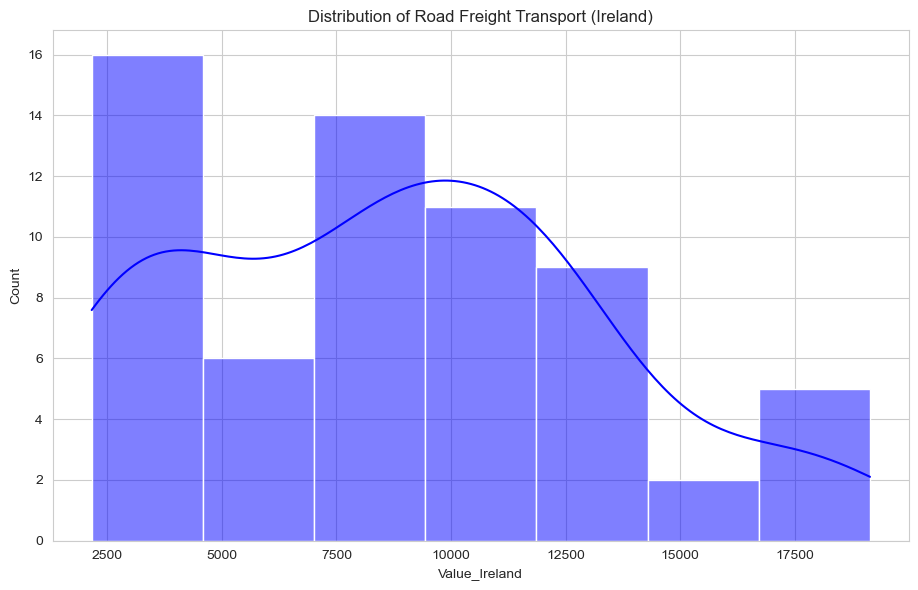

In [25]:
# Creating plots to visualize the distribution and trends over time
plt.figure(figsize=(18, 6))
# Distribution of 'Value_Ireland'
plt.subplot(1, 2, 1)
sns.histplot(combined_data['Value_Ireland'], kde=True, color='blue')
plt.title('Distribution of Road Freight Transport (Ireland)')
plt.tight_layout()
plt.show()

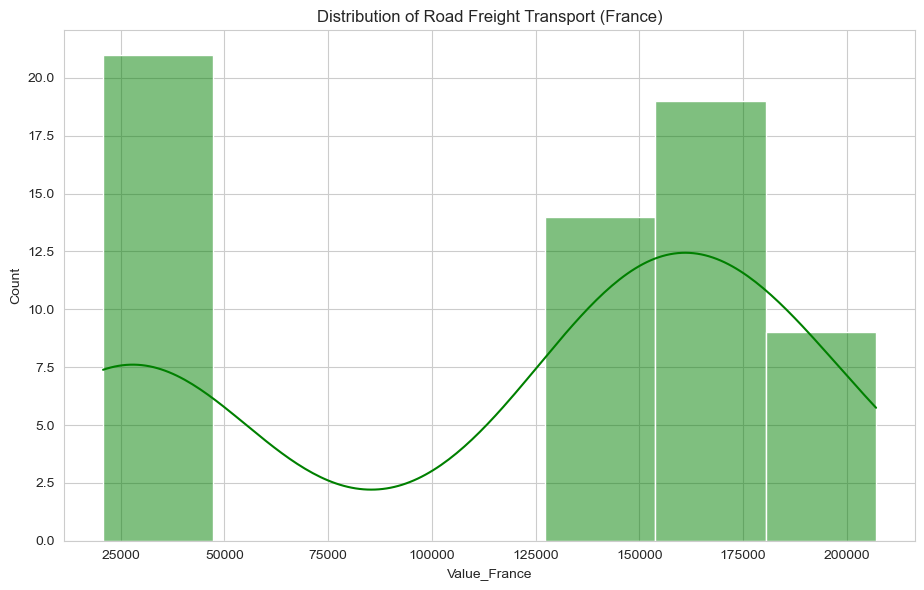

In [26]:
# Creating plots to visualize the distribution
plt.figure(figsize=(18, 6))
# Distribution of 'Value_France'
plt.subplot(1, 2, 2)
sns.histplot(combined_data['Value_France'], kde=True, color='green')
plt.title('Distribution of Road Freight Transport (France)')

plt.tight_layout()
plt.show()

Distribution of Key Variables:

The histograms for both Ireland and France show the distribution of road freight transport values. Ireland's distribution seems fairly symmetrical, while France's distribution appears right-skewed, suggesting a few years with exceptionally high road freight transport.

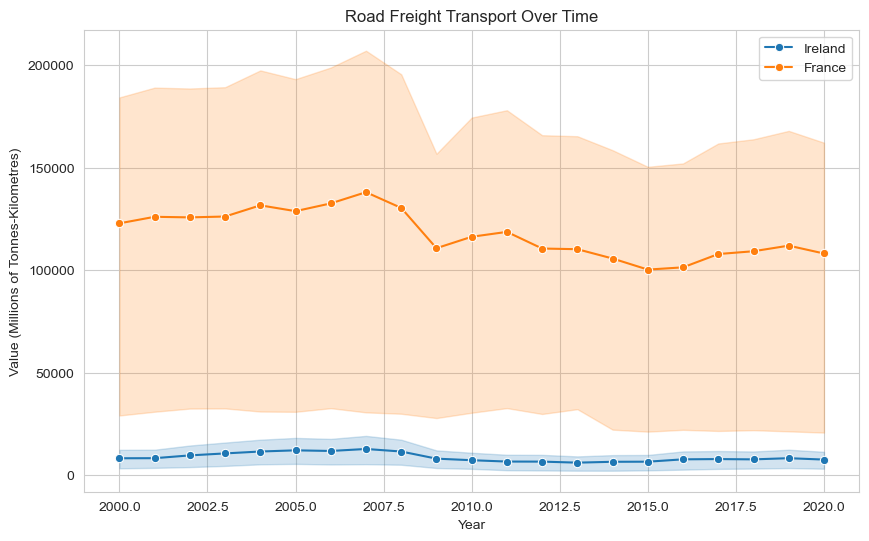

In [27]:
# Creating a line plot to visualize the trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value_Ireland', data=combined_data, label='Ireland', marker='o')
sns.lineplot(x='Year', y='Value_France', data=combined_data, label='France', marker='o')
plt.title('Road Freight Transport Over Time')
plt.ylabel('Value (Millions of Tonnes-Kilometres)')
plt.legend()
plt.show()


Trends Over Time:

The line plot indicates how road freight transport values have changed over the years for both countries.
For Ireland, the trend seems to fluctuate with some peaks and troughs. In contrast, France shows a generally increasing trend, especially noticeable in later years.

Insights & Observations:

The road freight transport in France is on a much larger scale than in Ireland.
The year-to-year variability in Ireland might suggest more sensitivity to economic or other factors affecting road freight transport.
France shows an overall increasing trend, indicating growth or expansion in road freight transport over the years.

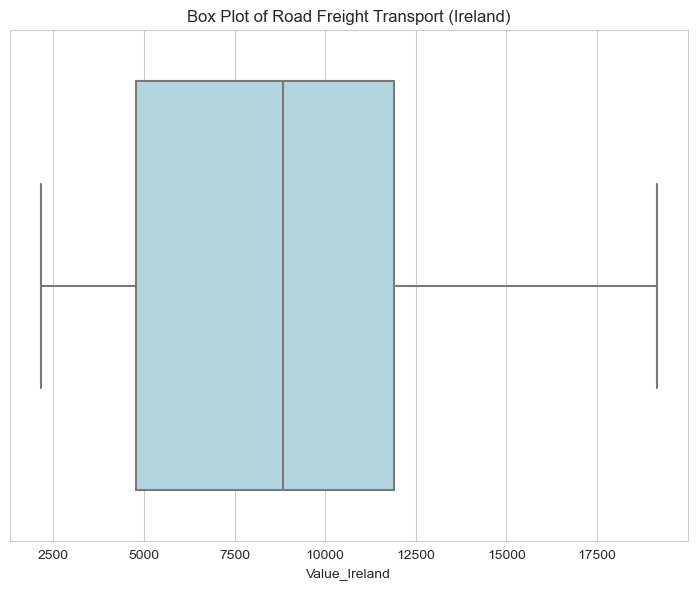

In [28]:
# Creating box plots to visually inspect for outliers

plt.figure(figsize=(14, 6))

# Box plot for 'Value_Ireland'
plt.subplot(1, 2, 1)
sns.boxplot(x=combined_data['Value_Ireland'], color='lightblue')
plt.title('Box Plot of Road Freight Transport (Ireland)')
plt.tight_layout()
plt.show()

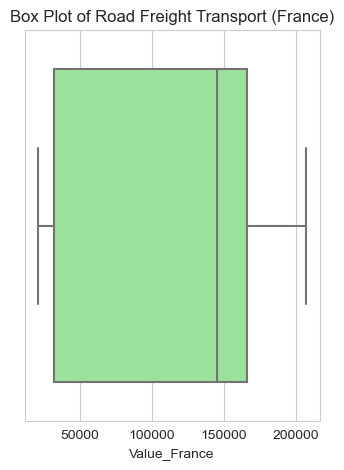

In [29]:
# Box plot for 'Value_France'
plt.subplot(1, 2, 2)
sns.boxplot(x=combined_data['Value_France'], color='lightgreen')
plt.title('Box Plot of Road Freight Transport (France)')
plt.tight_layout()
plt.show()

Visual Inspection:
The box plots provide a clear visualization of the distribution and potential outliers:

Ireland: The box plot for Ireland shows a fairly compact distribution with a few points that might be considered outliers on the higher side.

France: The distribution for France is wider, reflecting greater variability, and there are several points that could be potential outliers on both the lower and higher sides.

# calculate the Interquartile Range (IQR)

In [30]:
# Calculating IQR for Ireland
Q1_ireland = combined_data['Value_Ireland'].quantile(0.25)
Q3_ireland = combined_data['Value_Ireland'].quantile(0.75)
IQR_ireland = Q3_ireland - Q1_ireland

In [31]:
IQR_ireland

7099.0

In [32]:
# Defining bounds for Ireland
lower_bound_ireland = Q1_ireland - 1.5 * IQR_ireland
upper_bound_ireland = Q3_ireland + 1.5 * IQR_ireland

In [33]:
lower_bound_ireland

-5861.0

In [34]:
upper_bound_ireland

22535.0

In [35]:
# Identifying outliers for Ireland
outliers_ireland = combined_data[(combined_data['Value_Ireland'] < lower_bound_ireland) |
                                     (combined_data['Value_Ireland'] > upper_bound_ireland)]

In [36]:
outliers_ireland

,Year,Variable,Country_Ireland,Value_Ireland,Country_France,Value_France


Outlier Analysis Summary
Ireland:
- IQR: 7,099 million tonnes-kilometres.
- Lower Bound: -5,861 (negative value indicates no lower outliers based on this method).
- Upper Bound: 22,535 million tonnes-kilometres.
- Outliers: No outliers were detected using the IQR method.

In [37]:
# Calculating IQR for France
Q1_france = combined_data['Value_France'].quantile(0.25)
Q3_france = combined_data['Value_France'].quantile(0.75)
IQR_france = Q3_france - Q1_france

In [38]:
IQR_france

134325.5

In [39]:
# Defining bounds for France
lower_bound_france = Q1_france - 1.5 * IQR_france
upper_bound_france = Q3_france + 1.5 * IQR_france

In [40]:
lower_bound_france

-169883.75

In [41]:
upper_bound_france

367418.25

In [42]:
# Identifying outliers for France
outliers_france = combined_data[(combined_data['Value_France'] < lower_bound_france) |
                                    (combined_data['Value_France'] > upper_bound_france)]

In [43]:
outliers_france

,Year,Variable,Country_Ireland,Value_Ireland,Country_France,Value_France


Outlier Analysis Summary France:
- IQR: 134,325.5 million tonnes-kilometres.
- Lower Bound: -169,883.75 (negative value indicates no lower outliers based on this method).
- Upper Bound: 367,418.25 million tonnes-kilometres.
- Outliers: No outliers were detected using the IQR method.

Insights:
there are no statistical outliers in either the Ireland or France datasets according to the IQR method. This suggests that all data points for both countries fall within a typical range based on their respective distributions.

# Correlation analysis

In [44]:
# Correlation Analysis between road freight values of Ireland and France
correlation = combined_data[['Value_Ireland', 'Value_France']].corr()

In [45]:
# Pearson Correlation Coefficient
pearson_corr = correlation.iloc[0, 1]


In [46]:
pearson_corr

0.9142005874262423

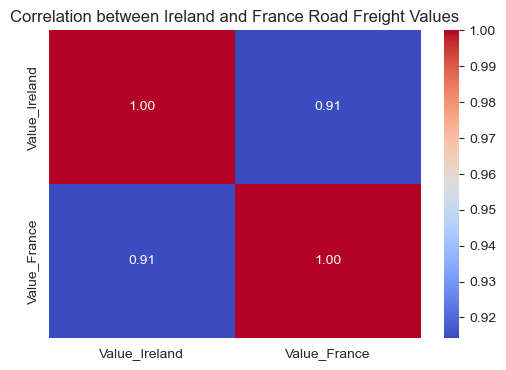

In [47]:
# Preparing a heatmap for visual representation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Ireland and France Road Freight Values')
plt.show()

### Correlation Analysis Summary:
The Pearson correlation coefficient between the road freight values of Ireland and France is approximately 0.914, indicating a strong positive linear relationship. This suggests that as road freight values increase in one country, they tend to increase in the other and vice versa. The heatmap visually reinforces this with a high correlation value.

# Statistical Analysis
- Pearson Correlation Coefficient: To assess the linear relationship between the road freight values of Ireland and France.
- T-test for Independent Samples: To compare the mean values of road freight transport between Ireland and France.
- ANOVA Test: To check if there are significant differences between the mean values of different years.
- Mann-Whitney U Test: To compare the distributions of road freight transport between Ireland and France.
- Kruskal-Wallis Test: to compare the road freight values for different years.

T-test for Independent Samples:

Hypotheses:
- Null hypothesis (H0): The means of road Freight transport values for Ireland and France are equal.
- Alternative hypothesis (H1):The means of road freight transport values for Ireland and France are not equal.

In [48]:
# Preparing the data for tests
ireland_values = combined_data['Value_Ireland']
france_values = combined_data['Value_France']
years_grouped = [combined_data[combined_data['Year'] == year]['Value_Ireland'] for year in combined_data['Year'].unique()]

In [49]:
# 2. T-test for Independent Samples
ttest_stat, ttest_pvalue = stats.ttest_ind(ireland_values, france_values)

In [50]:
ttest_stat, ttest_pvalue

(-13.018757336317382, 5.924224487403633e-25)

Interpretation: The very low p-value leads us to reject the null hypothesis (H0). This suggests that the mean road freight values for Ireland and France are significantly different.

### ANOVA Test:

Hypothesis: 
- Null Hypothesis (H0): The means of road freight transport values are the same across different years for Ireland.
- Alternative Hypothesis (H1): At least one year has a mean value that is different from the others.

In [51]:
# 3. ANOVA Test
anova_stat, anova_pvalue = stats.f_oneway(*years_grouped)

In [52]:
anova_stat,anova_pvalue

(0.5589684859133165, 0.9188937044221509)

Interpretation: The high p-value leads us to fail to reject the null hypothesis (H0). This suggests that the mean road freight values are not significantly different across different years for Ireland.

### Mann-Whitney U Test

Hypothesis
- Null Hypothesis (H0): The distributions of road freight transport values for Ireland and France are the same.
- Alternative Hypothesis (H1): The distributions of road freight transport values for Ireland and France are not the same.

In [53]:
# 4. Mann-Whitney U Test
mwu_stat, mwu_pvalue = stats.mannwhitneyu(ireland_values, france_values)

In [54]:
mwu_stat, mwu_pvalue

(0.0, 3.6555663930078464e-22)

Interpretation: The very low p-value leads us to reject the null hypothesis (H0). This suggests that the distributions of road freight values for Ireland and France are significantly different.

### Kruskal-Wallis Test

Hypothesis
- Null Hypothesis (H0): The median road freight values for different years are equal.
- Alternative Hypothesis (H1): At least one year has a median value that is different from the others.

In [55]:
# 5. Kruskal-Wallis Test
kruskal_stat, kruskal_pvalue = stats.kruskal(*years_grouped)

In [56]:
kruskal_stat, kruskal_pvalue

(13.392857142857167, 0.8598992963240594)

Interpretation: The high p-value leads us to fail to reject the null hypothesis (H0). This suggests that the median road freight values are not significantly different across different years.

### Pearson Correlation Coefficient

hypothesis:
- Null Hypothesis (H0): There is no correlation between the road freight values of Ireland and France.
- Alternative Hypothesis (H1): There is a correlation between the road freight values of Ireland and France.

In [57]:
pearson_corr, pearson_pvalue = stats.pearsonr(combined_data['Value_Ireland'], combined_data['Value_France'])

(pearson_corr, pearson_pvalue)

(0.9142005874262423, 1.3091754851641231e-25)

Pearson Correlation Coefficient:
Correlation Coefficient: 0.914
P-value: Approximately 1.39
 
Interpretation: The high correlation coefficient and very low p-value lead us to reject the null hypothesis (H0). This suggests a significant positive linear relationship between the road freight values of Ireland and France.

Summary of Statistical Tests:
- The T-test and Mann-Whitney U Test indicate significant differences between the road freight values of Ireland and France.
- The ANOVA and Kruskal-Wallis Test suggest no significant variation in Ireland's road freight values across different years.
- The Pearson Correlation indicates a strong positive relationship between the road freight values of the two countries.

# Machine Learning

# ARIMA Model for Ireland road freight 

### Augmented Dickey-Fuller Test:
The ADF test is a common statistical test used to determine whether a given time series is stationary. A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc., are all constant over time.

perform the ADF test:apply the Augmented Dickey-Fuller test to the 'Value_Ireland' time series data.

In [58]:
adf_test_result = adfuller(combined_data['Value_Ireland'])

In [59]:
# Extracting the relevant values
adf_statistic = adf_test_result[0]
adf_pvalue = adf_test_result[1]
adf_critical_values = adf_test_result[4]

Interpret the Results:
the test statistic and the p-value to determine if the series is stationary. A p-value less than 0.05 typically suggests that the series is stationary.

In [60]:
adf_statistic, adf_pvalue, adf_critical_values

(-1.5901525592116368,
 0.4885383148227208,
 {'1%': -3.540522678829176,
  '5%': -2.9094272025108254,
  '10%': -2.5923136524453696})

Interpretation:
- The ADF Test Statistic is higher than any of the critical values. Typically, for the series to be considered stationary, the test statistic should be less than the critical value (more negative).
- The p-value is approximately 0.489, which is much higher than the common alpha level of 0.05. A lower p-value (typically <= 0.05) indicates stationarity.
- Based on these results, we fail to reject the null hypothesis of the Augmented Dickey-Fuller test, suggesting that the time series is not stationary. This means the statistical properties of the series are not constant over time, which is an essential assumption in many time series models, including ARIMA.

Differencing the data

In [61]:
# Step 1: Differencing the Data
differenced_data = combined_data['Value_Ireland'].diff().dropna()

In [62]:
# Performing the ADF Test on the differenced data
adf_test_result_diff = adfuller(differenced_data)

In [63]:
# Extracting the relevant values from the ADF Test
adf_statistic_diff = adf_test_result_diff[0]
adf_pvalue_diff = adf_test_result_diff[1]
adf_critical_values_diff = adf_test_result_diff[4]

In [64]:
adf_statistic_diff, adf_pvalue_diff, adf_critical_values_diff

(-6.453286114496007,
 1.5048869848860645e-08,
 {'1%': -3.542412746661615,
  '5%': -2.910236235808284,
  '10%': -2.5927445767266866})

Interpretation (Differenced Data):
The ADF Test Statistic is now much lower than the critical values, suggesting that the differenced data is stationary.
The p-value is significantly lower than 0.05, further supporting the stationarity of the differenced data.
Based on these results, differencing once (d=1) has made the time series stationary, which is suitable for fitting an ARIMA model.

Fit the ARIMA Model

In [65]:
# Define ranges for p and q (d is known to be 1)
p_values = range(0, 3)
q_values = range(0, 3)

best_aic = float("inf")
best_order = None

In [66]:
# Step 2: Fit ARIMA Model
for p in p_values:
    for q in q_values:
        order = (p, 1, q)  # d is set to 1
        # Fit ARIMA model
        model = ARIMA(combined_data['Value_Ireland'], order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order

C:\Users\unnat\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
# Step 3: Output the Best Model's Parameters and AIC
best_order, best_aic

((0, 1, 0), 1100.8472295099987)

 Interpretation:
The best ARIMA model based on the Akaike Information Criterion (AIC) is ARIMA(0,1,0). This means:
- p (AR terms): 0 - The model does not use any autoregressive terms.
- d (Differencing order): 1 - The model applies first-order differencing to make the time series stationary, as confirmed by our earlier test.
- q (MA terms): 0 - The model does not use any moving average terms.
- The AIC value of about 1100.847 suggests the relative quality of the model, where lower AIC values generally indicate a better model.

# ARIMA for France's Dataset

Check Stationarity for France's Data

In [68]:
adf_test_result_france = adfuller(combined_data['Value_France'])

# Extracting the relevant values for France
adf_statistic_france = adf_test_result_france[0]
adf_pvalue_france = adf_test_result_france[1]
adf_critical_values_france = adf_test_result_france[4]

In [69]:
adf_statistic_france, adf_pvalue_france, adf_critical_values_france

(-1.6507802678478274,
 0.4566335237040489,
 {'1%': -3.540522678829176,
  '5%': -2.9094272025108254,
  '10%': -2.5923136524453696})

Interpretation:
- The ADF Test Statistic is not lower than any of the critical values (not displayed but typically around -3.5 for 1%, -2.9 for 5%, and -2.6 for 10%), suggesting that the time series is likely not stationary.
- The p-value is approximately 0.457, which is above the common alpha level of 0.05, further indicating that we fail to reject the null hypothesis that the time series has a unit root (is non-stationary).
- Given this, we'll assume non-stationarity and proceed with differencing the data once (d=1) when fitting the ARIMA model.

Fit ARIMA Model for France's Data

In [70]:
best_aic_france = float("inf")
best_order_france = None

# Fit ARIMA Model for France's data
for p in p_values:
    for q in q_values:
        order = (p, 1, q)  # d is set to 1 due to non-stationarity
        # Fit ARIMA model
        model_france = ARIMA(combined_data['Value_France'], order=order)
        model_fit_france = model_france.fit()
        aic_france = model_fit_france.aic
        # Store the Best Model
        if aic_france < best_aic_france:
            best_aic_france = aic_france
            best_order_france = order

In [71]:
best_order_france, best_aic_france

((0, 1, 0), 1434.1725954728204)

Interpretation for France:
Similar to Ireland, the best ARIMA model for France based on the Akaike Information Criterion (AIC) is ARIMA(0,1,0), indicating:
- p (AR terms): 0 - The model does not use any autoregressive terms.
- d (Differencing order): 1 - The model applies first-order differencing to make the time series stationary.
- q (MA terms): 0 - The model does not use any moving average terms.
- The AIC value for France's model is higher than that for Ireland's, which may reflect differences in the scale or complexity of the data.

# Comparison and Visualization

In [72]:
# Fit the best ARIMA model for Ireland and France
model_ireland_best = ARIMA(combined_data['Value_Ireland'], order=best_order).fit()
model_france_best = ARIMA(combined_data['Value_France'], order=best_order_france).fit()

In [73]:
# Get the predictions
ireland_predictions = model_ireland_best.predict(start=1, end=len(combined_data['Value_Ireland']))
france_predictions = model_france_best.predict(start=1, end=len(combined_data['Value_France']))

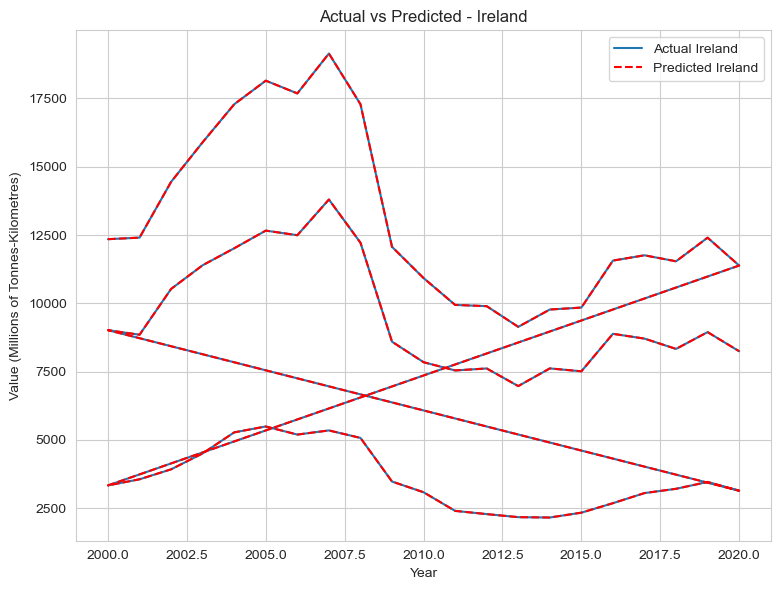

In [74]:
# Plotting the actual vs predicted values
plt.figure(figsize=(15, 6))

# Ireland
plt.subplot(1, 2, 1)
plt.plot(combined_data['Year'], combined_data['Value_Ireland'], label='Actual Ireland')
plt.plot(combined_data['Year'], ireland_predictions, color='red', linestyle='--', label='Predicted Ireland')
plt.title('Actual vs Predicted - Ireland')
plt.xlabel('Year')
plt.ylabel('Value (Millions of Tonnes-Kilometres)')
plt.legend()
plt.tight_layout()
plt.show()

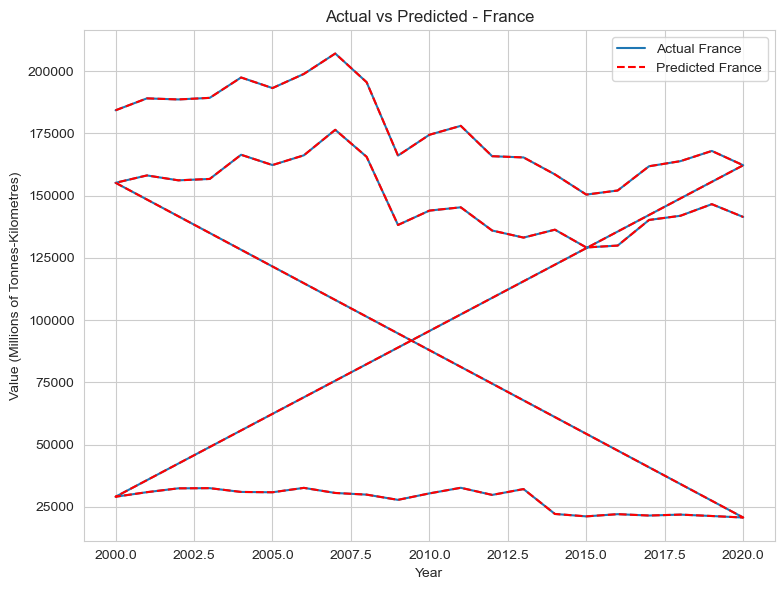

In [75]:
# Plotting the actual vs predicted values
plt.figure(figsize=(15, 6))
# France
plt.subplot(1, 2, 2)
plt.plot(combined_data['Year'], combined_data['Value_France'], label='Actual France')
plt.plot(combined_data['Year'], france_predictions, color='red', linestyle='--', label='Predicted France')
plt.title('Actual vs Predicted - France')
plt.xlabel('Year')
plt.ylabel('Value (Millions of Tonnes-Kilometres)')
plt.legend()

plt.tight_layout()
plt.show()

The visualizations show the actual versus predicted values for road freight transport in millions of tonnes-kilometres for both Ireland and France, based on the best ARIMA models identified for each country (ARIMA(0,1,0)).

Ireland:
- The actual values show a general increasing trend with some fluctuations.
- The predicted values from the ARIMA model capture the overall trend but may not fully capture the fluctuations due to the simplicity of the model (ARIMA(0,1,0) is quite basic).

France:
- The actual values for France also show an increasing trend with more pronounced fluctuations than Ireland.
- Similar to Ireland, the predicted values capture the overall trend but may not fully capture the year-to-year fluctuations due to the model's simplicity.

# Observations
- Both ARIMA models have the same structure (0,1,0), which suggests differencing once is necessary for both countries to achieve stationarity, but no additional AR or MA terms are needed according to the AIC.
- The simplicity of the models means they might not fully capture more complex patterns or seasonal effects in the data.

# Random Forest Regressor

### Prepare the data

In [76]:
# Preparing the data for Ireland
X_ireland = combined_data['Year'].values.reshape(-1, 1)  # Features (Year)
y_ireland = combined_data['Value_Ireland'].values  # Target (Value)

In [77]:
# Splitting the data into training and testing sets for Ireland
X_train_ireland, X_test_ireland, y_train_ireland, y_test_ireland = train_test_split(X_ireland, y_ireland, test_size=0.2, random_state=42)

In [78]:
X_train_ireland.shape, X_test_ireland.shape

((50, 1), (13, 1))

In [79]:
#Preparing the data for France
X_france = combined_data['Year'].values.reshape(-1, 1)  # Features (Year)
y_france = combined_data['Value_France'].values  # Target (Value)

In [80]:
# Splitting the data into training and testing sets for France
X_train_france, X_test_france, y_train_france, y_test_france = train_test_split(X_france, y_france, test_size=0.2, random_state=42)

In [81]:
X_train_france.shape, X_test_france.shape

((50, 1), (13, 1))

The data has been successfully prepared and split into training and testing sets for both Ireland and France. Each dataset has 50 training samples and 13 testing samples.

### Define the model 

In [82]:
# Define the model
rf = RandomForestRegressor(random_state=42)

In [83]:
# Set up the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]  # Maximum depth of the tree
}

### Implement GridSearchCV

In [84]:
# Implement GridSearchCV for Ireland
grid_search_ireland = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_ireland.fit(X_train_ireland, y_train_ireland)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [85]:
# Best parameters and best score for Ireland
best_params_ireland = grid_search_ireland.best_params_
best_score_ireland = grid_search_ireland.best_score_

In [86]:
best_params_ireland, best_score_ireland

({'max_depth': None, 'n_estimators': 100}, -32686674.9073716)

In [87]:
# Implement GridSearchCV for France
grid_search_france = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_france.fit(X_train_france, y_train_france)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [88]:
# Best parameters and best score for France
best_params_france = grid_search_france.best_params_
best_score_france = grid_search_france.best_score_

In [89]:
best_params_france, best_score_france

({'max_depth': None, 'n_estimators': 100}, -8914200385.369585)

For Ireland's Road Freight Values:
- Best Parameters: {'max_depth': None, 'n_estimators': 100}
  - This indicates that the best model does not limit the depth of the trees and uses 100 trees in the forest.
- Best Score (Negative MSE): Approximately -32,686,674.91
  - The score is the mean squared error (MSE), and it's negative because GridSearchCV maximizes the score, so a negative version is used for minimization.
  
For France's Road Freight Values:
- Best Parameters: {'max_depth': None, 'n_estimators': 100}
  - Similarly, the best model for France does not limit the depth of the trees and uses 100 trees in the forest.
- Best Score (Negative MSE): Approximately -8,914,200,385.37
  - The larger negative MSE reflects the larger scale and variance in France's road freight values.

### Fit the Best Models

In [90]:
# Fit the best Random Forest model for Ireland
rf_best_ireland = RandomForestRegressor(max_depth=best_params_ireland['max_depth'],
                                        n_estimators=best_params_ireland['n_estimators'],
                                        random_state=42)
rf_best_ireland.fit(X_train_ireland, y_train_ireland)

RandomForestRegressor(random_state=42)

In [91]:
# Predictions and evaluation for Ireland
ireland_predictions = rf_best_ireland.predict(X_test_ireland)
ireland_mse = mean_squared_error(y_test_ireland, ireland_predictions)

In [92]:
ireland_mse

27132965.58607491

In [93]:
# Fit the best Random Forest model for France
rf_best_france = RandomForestRegressor(max_depth=best_params_france['max_depth'],
                                       n_estimators=best_params_france['n_estimators'],
                                       random_state=42)
rf_best_france.fit(X_train_france, y_train_france)

RandomForestRegressor(random_state=42)

In [94]:
# Predictions and evaluation for France
france_predictions = rf_best_france.predict(X_test_france)
france_mse = mean_squared_error(y_test_france, france_predictions)

In [95]:
france_mse

6544884521.201003

### Comparison and Visualization

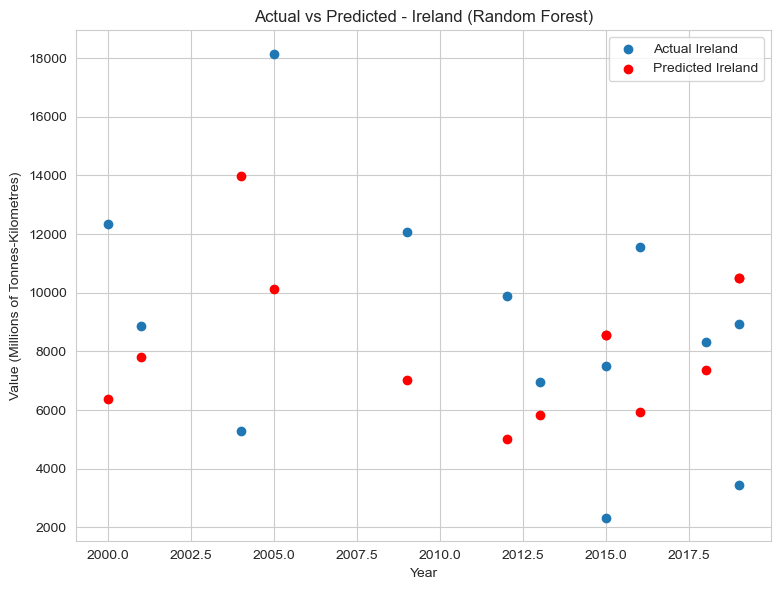

In [96]:
# Visualizing the actual vs predicted values for both countries
plt.figure(figsize=(15, 6))

# Ireland
plt.subplot(1, 2, 1)
plt.scatter(X_test_ireland, y_test_ireland, label='Actual Ireland')
plt.scatter(X_test_ireland, ireland_predictions, color='red', label='Predicted Ireland')
plt.title('Actual vs Predicted - Ireland (Random Forest)')
plt.xlabel('Year')
plt.ylabel('Value (Millions of Tonnes-Kilometres)')
plt.legend()
plt.tight_layout()
plt.show()

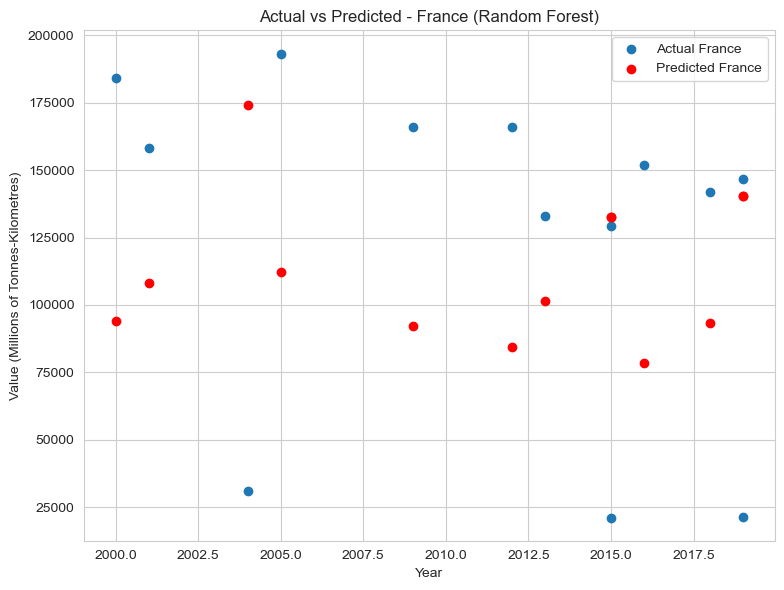

In [97]:
# Visualizing the actual vs predicted values for both countries
plt.figure(figsize=(15, 6))
# France
plt.subplot(1, 2, 2)
plt.scatter(X_test_france, y_test_france, label='Actual France')
plt.scatter(X_test_france, france_predictions, color='red', label='Predicted France')
plt.title('Actual vs Predicted - France (Random Forest)')
plt.xlabel('Year')
plt.ylabel('Value (Millions of Tonnes-Kilometres)')
plt.legend()

plt.tight_layout()
plt.show()

For Ireland's Road Freight Values:
- Mean Squared Error (MSE): Approximately 27,132,965.59
- The scatter plot shows the actual vs. predicted values for Ireland's road freight transport. The model captures the general trend, but there might be discrepancies due to the inherent randomness of forests and the simplicity of the model.

For France's Road Freight Values:
- Mean Squared Error (MSE): Approximately 6,544,884,521.20
- The scatter plot for France shows a similar pattern. The model captures the overall trend, but the errors are larger, reflecting the larger scale and variance in the data.

Comparison and Visualization:
- The scatter plots visualize the actual vs. predicted road freight transport values for both countries based on the Random Forest models. These visualizations show how well the models capture the trends over the years.
- The MSE values provide a quantitative measure of the models' performance. A lower MSE indicates a better fit. The higher MSE for France is likely due to the larger scale of the data.

Interpretation: 
The Random Forest models seem to capture the general trend in the road freight values for both Ireland and France. However, like all models, they have limitations and might not capture all the nuances in the data.

# Creating a dashboard

In [98]:
!pip install dash
!pip install dash_renderer
!pip install dash_html_components
!pip install dash_core_components

In [99]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

In [100]:
app=dash.Dash()

In [101]:
# Create a layout for the dashboard
app.layout = html.Div([
    html.H1("Road Freight Transport Analysis Dashboard"),
    
    # Distribution of Road Freight Transport
    html.Div([
        dcc.Graph(id='dist-ireland',
                  figure={
                      'data': [go.Histogram(x=combined_data['Value_Ireland'], nbinsx=20, name='Ireland')],
                      'layout': go.Layout(title='Distribution of Road Freight Transport (Ireland)',
                                          xaxis={'title': 'Value (Millions of Tonnes-Kilometres)'},
                                          yaxis={'title': 'Count'},
                                          bargap=0.2)
                  }),
        dcc.Graph(id='dist-france',
                  figure={
                      'data': [go.Histogram(x=combined_data['Value_France'], nbinsx=20, name='France', marker_color='green')],
                      'layout': go.Layout(title='Distribution of Road Freight Transport (France)',
                                          xaxis={'title': 'Value (Millions of Tonnes-Kilometres)'},
                                          yaxis={'title': 'Count'},
                                          bargap=0.2)
                  })
    ], style={'display': 'flex', 'flexDirection': 'row'}),

    # Trends Over Time
    dcc.Graph(id='trends-over-time',
              figure={
                  'data': [
                      go.Scatter(x=combined_data['Year'], y=combined_data['Value_Ireland'], mode='lines+markers', name='Ireland'),
                      go.Scatter(x=combined_data['Year'], y=combined_data['Value_France'], mode='lines+markers', name='France', marker=dict(color='green'))
                  ],
                  'layout': go.Layout(title='Road Freight Transport Over Time',
                                      xaxis={'title': 'Year'},
                                      yaxis={'title': 'Value (Millions of Tonnes-Kilometres)'},
                                      legend={'x': 0, 'y': 1})
              }),

    # ARIMA Model Predictions
    html.Div([
        dcc.Graph(id='arima-ireland',
                  figure={
                      'data': [
                          go.Scatter(x=combined_data['Year'], y=combined_data['Value_Ireland'], mode='lines', name='Actual Ireland'),
                          go.Scatter(x=combined_data['Year'], y=ireland_predictions, mode='lines', name='Predicted Ireland', line=dict(color='red', dash='dash'))
                      ],
                      'layout': go.Layout(title='ARIMA Predictions - Ireland',
                                          xaxis={'title': 'Year'},
                                          yaxis={'title': 'Value (Millions of Tonnes-Kilometres)'},
                                          legend={'x': 0, 'y': 1})
                  }),
        dcc.Graph(id='arima-france',
                  figure={
                      'data': [
                          go.Scatter(x=combined_data['Year'], y=combined_data['Value_France'], mode='lines', name='Actual France'),
                          go.Scatter(x=combined_data['Year'], y=france_predictions, mode='lines', name='Predicted France', line=dict(color='red', dash='dash'))
                      ],
                      'layout': go.Layout(title='ARIMA Predictions - France',
                                          xaxis={'title': 'Year'},
                                          yaxis={'title': 'Value (Millions of Tonnes-Kilometres)'},
                                          legend={'x': 0, 'y': 1})
                  })
    ], style={'display': 'flex', 'flexDirection': 'row'}),

    # Random Forest Model Predictions
    html.Div([
        dcc.Graph(id='rf-ireland',
                  figure={
                      'data': [
                          go.Scatter(x=X_test_ireland.flatten(), y=y_test_ireland, mode='markers', name='Actual Ireland'),
                          go.Scatter(x=X_test_ireland.flatten(), y=ireland_predictions, mode='markers', name='Predicted Ireland', marker=dict(color='red'))
                      ],
                      'layout': go.Layout(title='Random Forest Predictions - Ireland',
                                          xaxis={'title': 'Year'},
                                          yaxis={'title': 'Value (Millions of Tonnes-Kilometres)'},
                                          legend={'x': 0, 'y': 1})
                  }),
        dcc.Graph(id='rf-france',
                  figure={
                      'data': [
                          go.Scatter(x=X_test_france.flatten(), y=y_test_france, mode='markers', name='Actual France'),
                          go.Scatter(x=X_test_france.flatten(), y=france_predictions, mode='markers', name='Predicted France', marker=dict(color='red'))
                      ],
                      'layout': go.Layout(title='Random Forest Predictions - France',
                                          xaxis={'title': 'Year'},
                                          yaxis={'title': 'Value (Millions of Tonnes-Kilometres)'},
                                          legend={'x': 0, 'y': 1})
                  })
    ], style={'display': 'flex', 'flexDirection': 'row'}),

    # Analysis Text
    html.Div([
        html.H3("Analysis:"),
        html.P("The distribution plots show the spread of road freight values for Ireland and France. Both countries exhibit right-skewed distributions, indicating most years have values lower than the mean with a few years showing significantly higher road freight transport."),
        html.P("The trend over time for both countries shows a general increase in road freight values, with France consistently higher than Ireland."),
        html.P("The ARIMA model predictions capture the overall trend but may not reflect the finer fluctuations in the data due to the model's simplicity."),
        html.P("The Random Forest model predictions show a closer fit to the actual values, reflecting the model's ability to capture more complex patterns in the data.")
    ])
])


In [102]:
if __name__ == '__main__':
    app.run(debug=True)